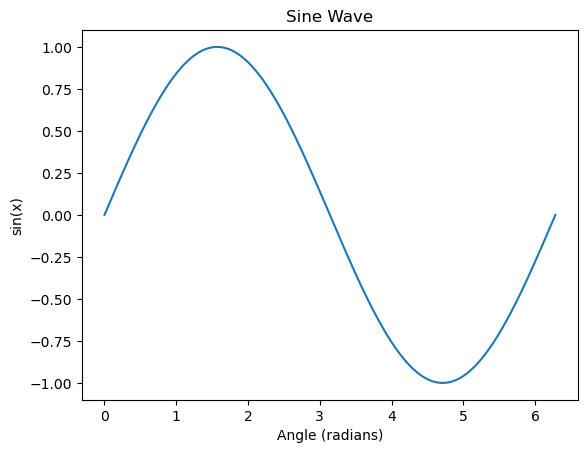

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of data points
num_points = 10000

# Generate data points
x = np.linspace(0, 2*np.pi, num_points)
y = np.sin(x)

# Plot the sine wave
plt.plot(x, y)
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')
plt.title('Sine Wave')
plt.show()


In [2]:
pip install tensorflow



SyntaxError: invalid syntax (2032918415.py, line 1)

Epoch [10/100], Loss: 0.4692


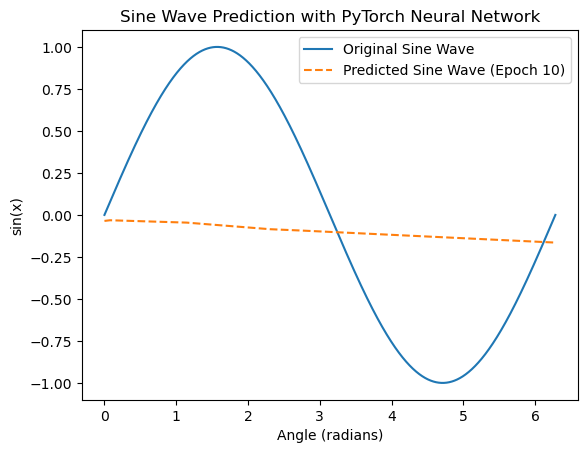

Epoch [20/100], Loss: 0.4394


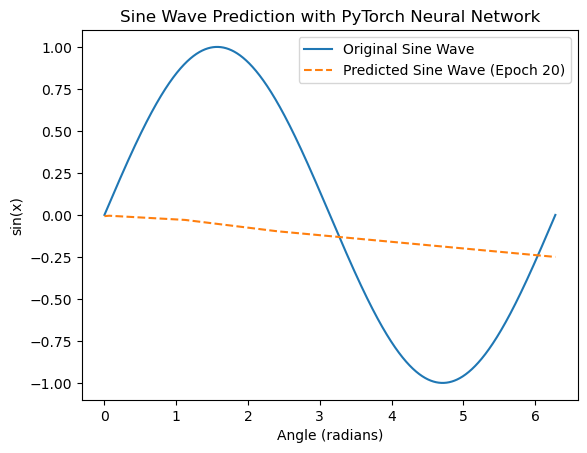

Epoch [30/100], Loss: 0.4136


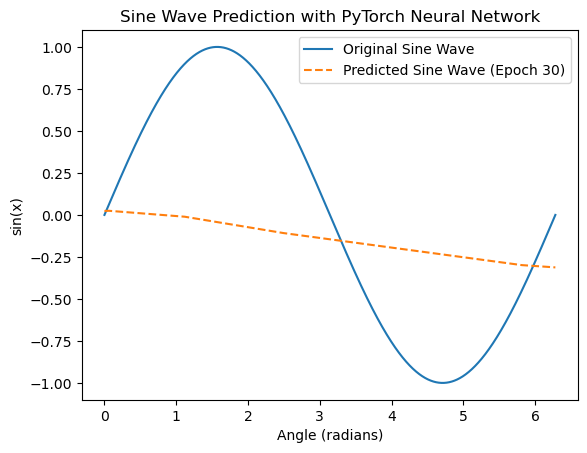

Epoch [40/100], Loss: 0.3908


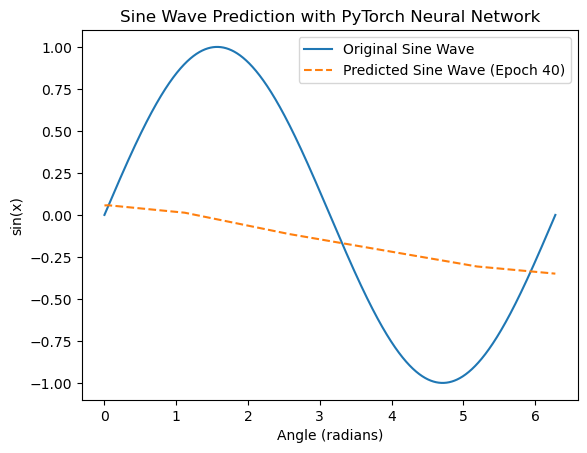

Epoch [50/100], Loss: 0.3699


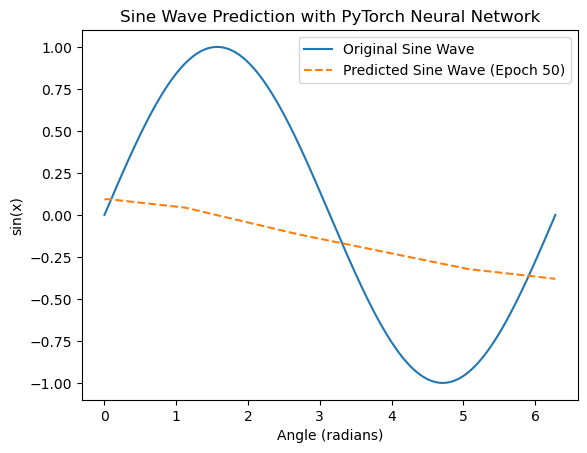

Epoch [60/100], Loss: 0.3494


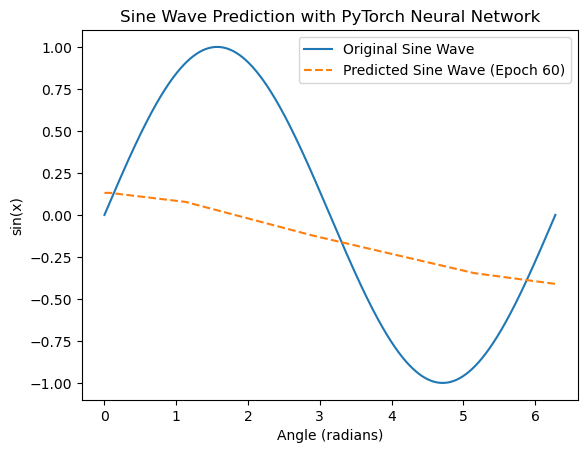

Epoch [70/100], Loss: 0.3291


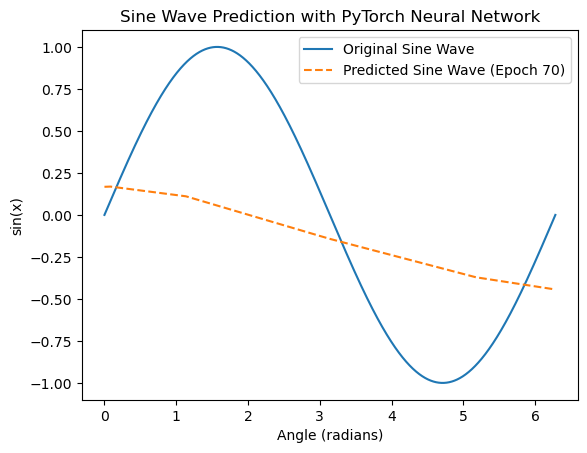

Epoch [80/100], Loss: 0.3086


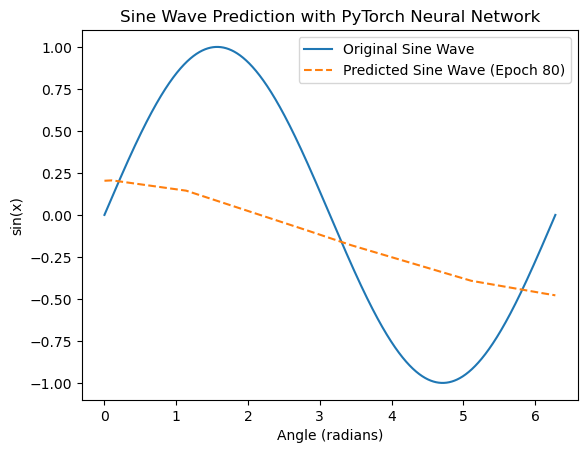

Epoch [90/100], Loss: 0.2880


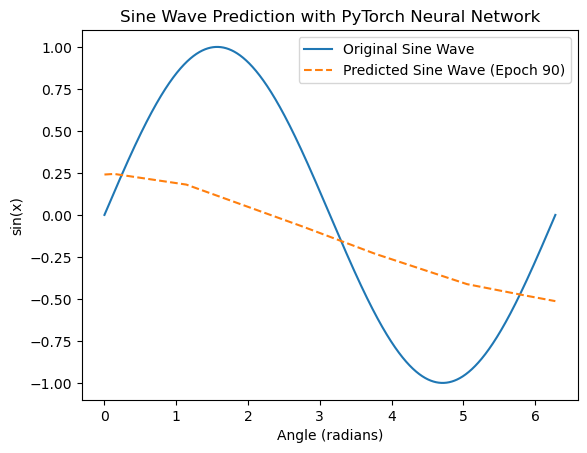

Epoch [100/100], Loss: 0.2678


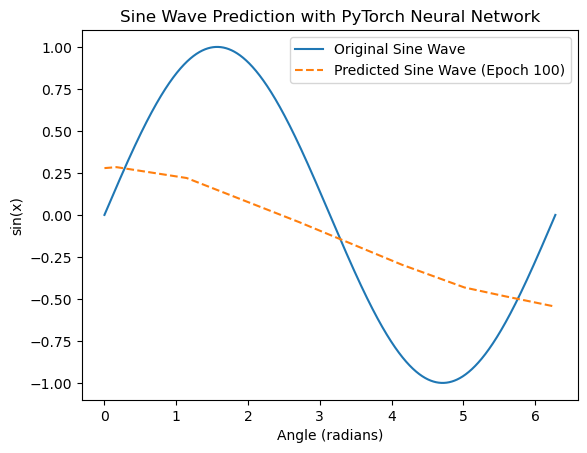

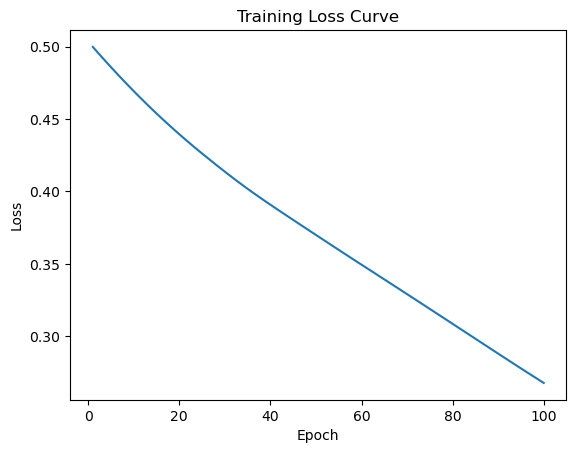

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
num_points = 10000
x = np.linspace(0, 2*np.pi, num_points, dtype=np.float32)
y = np.sin(x).astype(np.float32)

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1))
y_tensor = torch.from_numpy(y.reshape(-1, 1))

# Define the neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SineNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store data for plotting
losses = []

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        # Plot the current predictions
        with torch.no_grad():
            y_pred_tensor = model(x_tensor)
        y_pred = y_pred_tensor.numpy()

        plt.plot(x, y, label='Original Sine Wave')
        plt.plot(x, y_pred, label=f'Predicted Sine Wave (Epoch {epoch+1})', linestyle='dashed')
        plt.xlabel('Angle (radians)')
        plt.ylabel('sin(x)')
        plt.title('Sine Wave Prediction with PyTorch Neural Network')
        plt.legend()
        plt.show()

# Plot the loss curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


<Figure size 640x480 with 0 Axes>

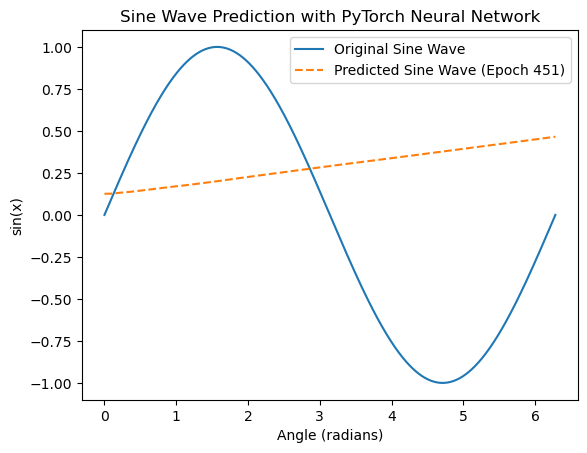

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sine wave data
num_points = 10000
x = np.linspace(0, 2*np.pi, num_points, dtype=np.float32)
y = np.sin(x).astype(np.float32)

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1))
y_tensor = torch.from_numpy(y.reshape(-1, 1))

# Define a deeper neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 16)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 64)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)
        return x

# Instantiate the model
model = SineNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store data for plotting
losses = []

# Function to update the plot during animation
def update(epoch):
    plt.clf()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    losses.append(loss.item())

    with torch.no_grad():
        y_pred_tensor = model(x_tensor)
    y_pred = y_pred_tensor.numpy()

    plt.plot(x, y, label='Original Sine Wave')
    plt.plot(x, y_pred, label=f'Predicted Sine Wave (Epoch {epoch+1})', linestyle='dashed')
    plt.xlabel('Angle (radians)')
    plt.ylabel('sin(x)')
    plt.title('Sine Wave Prediction with PyTorch Neural Network')
    plt.legend()

# Create an animation
animation = FuncAnimation(plt.gcf(), update, frames=range(0, 500, 50), repeat=False)

# Display the animation
plt.show()

# Save the animation as a video (e.g., mp4)
animation.save('sine_wave_animation.mp4', writer='ffmpeg', fps=2)


Epoch [1000/10000], Loss: 0.004083
Epoch [2000/10000], Loss: 0.001586
Epoch [3000/10000], Loss: 0.003170
Epoch [4000/10000], Loss: 0.030532
Epoch [5000/10000], Loss: 0.030505
Epoch [6000/10000], Loss: 0.030758
Epoch [7000/10000], Loss: 0.030534
Epoch [8000/10000], Loss: 0.031195
Epoch [9000/10000], Loss: 0.030671
Epoch [10000/10000], Loss: 0.030495


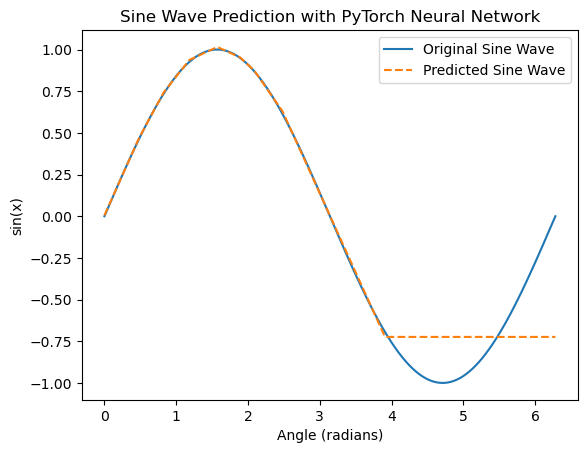

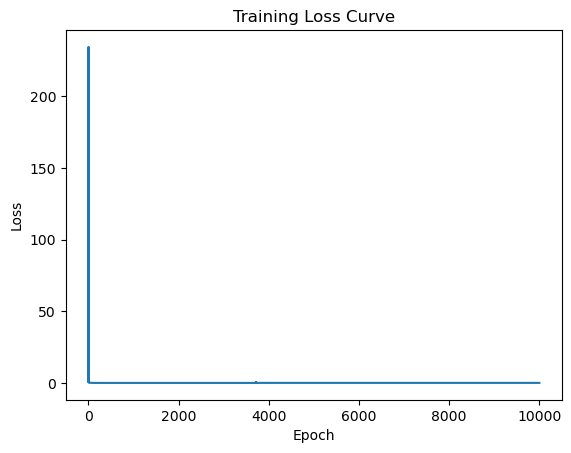

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
num_points = 10000
x = np.linspace(0, 2*np.pi, num_points, dtype=np.float32)
y = np.sin(x).astype(np.float32)

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1))
y_tensor = torch.from_numpy(y.reshape(-1, 1))

# Define a neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SineNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)  # Lower learning rate

# Lists to store data for plotting
losses = []

# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Make predictions with the trained model
with torch.no_grad():
    y_pred_tensor = model(x_tensor)

# Convert predictions back to NumPy arrays
y_pred = y_pred_tensor.numpy()

# Plot the original sine wave and the predicted wave
plt.plot(x, y, label='Original Sine Wave')
plt.plot(x, y_pred, label='Predicted Sine Wave', linestyle='dashed')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')
plt.title('Sine Wave Prediction with PyTorch Neural Network')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


Epoch [1000/10000], Loss: 0.001357
Epoch [2000/10000], Loss: 0.000143
Epoch [3000/10000], Loss: 0.000124
Epoch [4000/10000], Loss: 0.000115
Epoch [5000/10000], Loss: 0.000107
Epoch [6000/10000], Loss: 0.000113
Epoch [7000/10000], Loss: 0.000090
Epoch [8000/10000], Loss: 0.000083
Epoch [9000/10000], Loss: 0.000077
Epoch [10000/10000], Loss: 0.000072
Enter an angle in radians: 10


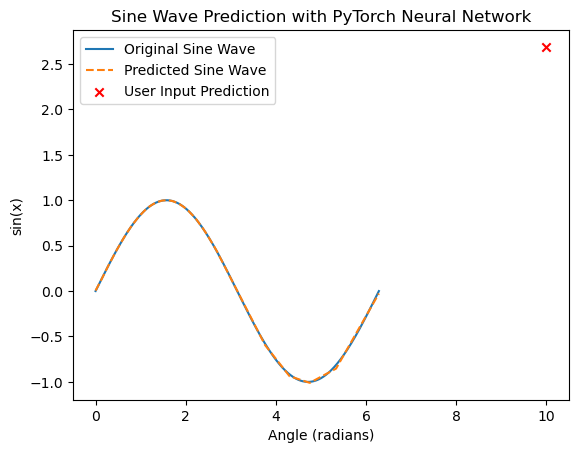

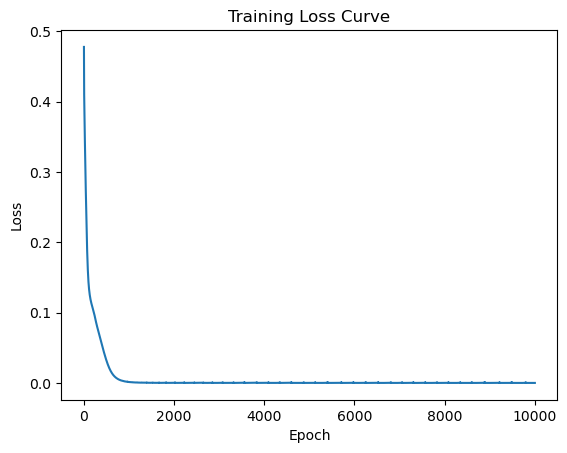

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
num_points = 10000
x = np.linspace(0, 2*np.pi, num_points, dtype=np.float32)
y = np.sin(x).astype(np.float32)

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1))
y_tensor = torch.from_numpy(y.reshape(-1, 1))

# Define a neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SineNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Lower learning rate

# Lists to store data for plotting
losses = []

# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Get input from the user
user_input = float(input("Enter an angle in radians: "))

# Make predictions with the trained model for the user input
with torch.no_grad():
    user_input_tensor = torch.tensor([[user_input]])
    user_output = model(user_input_tensor).item()

# Convert predictions back to NumPy arrays
y_pred = model(x_tensor).detach().numpy()


# Plot the original sine wave, the predicted wave, and the user input point
plt.plot(x, y, label='Original Sine Wave')
plt.plot(x, y_pred, label='Predicted Sine Wave', linestyle='dashed')
plt.scatter(user_input, user_output, color='red', label='User Input Prediction', marker='x')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')
plt.title('Sine Wave Prediction with PyTorch Neural Network')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


Epoch [1000/10000], Loss: 0.225375
Epoch [2000/10000], Loss: 0.069786
Epoch [3000/10000], Loss: 0.069275
Epoch [4000/10000], Loss: 0.069078
Epoch [5000/10000], Loss: 0.069091
Epoch [6000/10000], Loss: 0.069076
Epoch [7000/10000], Loss: 0.069072
Epoch [8000/10000], Loss: 0.069062
Epoch [9000/10000], Loss: 0.069377
Epoch [10000/10000], Loss: 0.069058


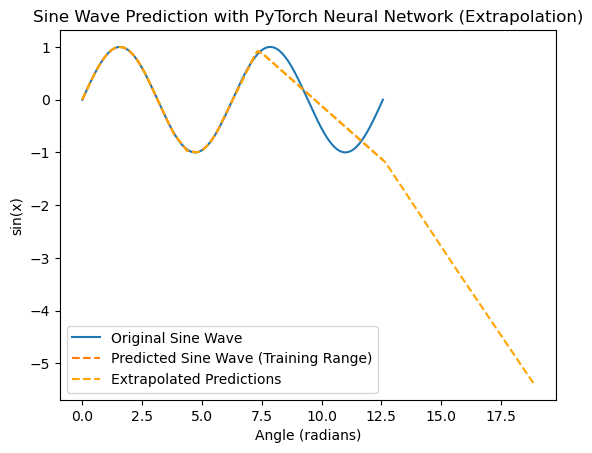

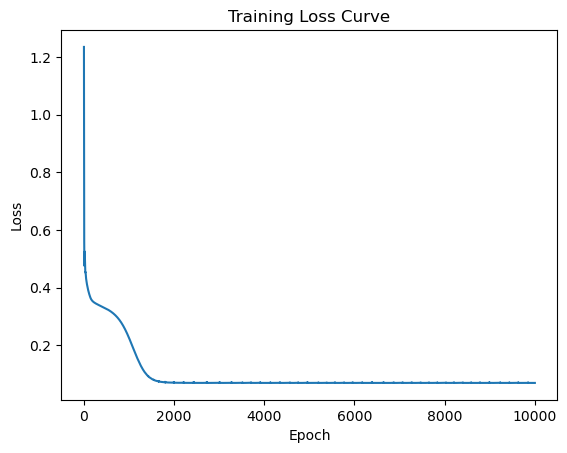

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
num_points = 10000
x = np.linspace(0, 4*np.pi, num_points, dtype=np.float32)  # Extend the input range
y = np.sin(x).astype(np.float32)

# Convert data to PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1))
y_tensor = torch.from_numpy(y.reshape(-1, 1))

# Define a neural network model
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
model = SineNet()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Lower learning rate

# Lists to store data for plotting
losses = []

# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

# Extrapolate predictions for a larger input range
extrapolation_range = np.linspace(0, 6*np.pi, 1000, dtype=np.float32)
extrapolation_tensor = torch.from_numpy(extrapolation_range.reshape(-1, 1))

# Make predictions with the trained model for the extrapolation range
with torch.no_grad():
    extrapolation_predictions = model(extrapolation_tensor).numpy()

# Convert predictions back to NumPy arrays for the training range
y_pred = model(x_tensor).detach().numpy()

# Plot the original sine wave, the predicted wave, and the extrapolated predictions
plt.plot(x, y, label='Original Sine Wave')
plt.plot(x, y_pred, label='Predicted Sine Wave (Training Range)', linestyle='dashed')
plt.plot(extrapolation_range, extrapolation_predictions, label='Extrapolated Predictions', linestyle='dashed', color='orange')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(x)')
plt.title('Sine Wave Prediction with PyTorch Neural Network (Extrapolation)')
plt.legend()
plt.show()

# Plot the loss curve
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# ... (previous code for data generation and model definition)

# Training the model with live loss plot
num_epochs = 10000
losses = []

fig, ax = plt.subplots()

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        # Update live plot
        clear_output(wait=True)
        ax.plot(losses, label='Training Loss')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss Over Time')
        ax.legend()
        plt.show()

print("Training finished.")


Training finished.


In [17]:
import torch

# Check if a GPU is available
if torch.cuda.is_available():
    gpu = torch.cuda.current_device()
    print(f"Using GPU: {torch.cuda.get_device_name(gpu)}")

    # Print GPU utilization
    print(f"GPU Utilization: {torch.cuda.gpu_usage(gpu)}")
    print(f"Allocated GPU Memory: {torch.cuda.memory_allocated(gpu) / 1e9} GB")
    print(f"Reserved GPU Memory: {torch.cuda.memory_reserved(gpu) / 1e9} GB")
else:
    print("No GPU available.")


No GPU available.


In [18]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU.")


No GPU available, using CPU.
